
As a data scientist at **Amazon**, you are given a dataset that has details about different customers with features like
- 'ID',
- 'n_clicks',
- 'n_visits', etc,

You are asked to segment these customers so that the **Amazon** can provide relevant and similar items to their customers, which will increase their overall sale.

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2025-08-21 10:30:10--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2025-08-21 10:30:10--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s    in 0.03s  

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.shape

(2500, 7)

In [ ]:
df.set_index('ID',inplace=True)

In [ ]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
ID,,,,,,
1476,130,65,213.905831,31.600751,233,235
1535,543,46,639.223004,5.689175,228,170
1807,520,102,1157.402763,844.321606,247,409
1727,702,83,1195.903634,850.041757,148,200
1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.index.name = None

In [ ]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
1476,130,65,213.905831,31.600751,233,235
1535,543,46,639.223004,5.689175,228,170
1807,520,102,1157.402763,844.321606,247,409
1727,702,83,1195.903634,850.041757,148,200
1324,221,84,180.754616,64.283300,243,259


##Sample Notation

In [ ]:
from IPython.display import Image
Image(url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/038/original/hierarch.gif?1663699414')

##Agglemorative Clustering

In [ ]:
  import pandas as pd
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.figsize"] = (18,10)
  import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
X=scaler.transform(df)

In [ ]:
X

array([[0.06688963, 0.22088353, 0.03257084, 0.01301296, 0.45330739,
        0.4017094 ],
       [0.41220736, 0.14457831, 0.0973327 , 0.00234276, 0.44357977,
        0.29059829],
       [0.39297659, 0.36947791, 0.17623449, 0.34768545, 0.48054475,
        0.6991453 ],
       ...,
       [0.27173913, 0.40562249, 0.        , 0.        , 0.16342412,
        0.77606838],
       [0.18478261, 0.08835341, 0.48580837, 0.03217462, 0.21595331,
        0.36752137],
       [0.63879599, 0.45381526, 0.21235018, 0.43873046, 0.48249027,
        0.25470085]])

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
scaled_df


,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
1476,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709
1535,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598
1807,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145
1727,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880
1324,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735
...,...,...,...,...,...,...
1854,0.630435,0.441767,0.076536,0.153769,0.706226,0.182906
1190,0.361204,0.200803,0.080704,0.050502,0.217899,0.605128
1316,0.271739,0.405622,0.000000,0.000000,0.163424,0.776068
32,0.184783,0.088353,0.485808,0.032175,0.215953,0.367521


##Aglomerative Clustering

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 2, 0])

In [ ]:
viz_df = scaled_df
viz_df['Y_Predicted'] = y_pred

In [ ]:
viz_df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,Y_Predicted
1476,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,1
1535,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,1
1807,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,0
1727,0.545151,0.293173,0.182097,0.350041,0.287938,0.341880,0
1324,0.142977,0.297189,0.027523,0.026471,0.472763,0.442735,1


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward method
Z = sch.linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


##### **Plotting the characteristics of the learned clusters**

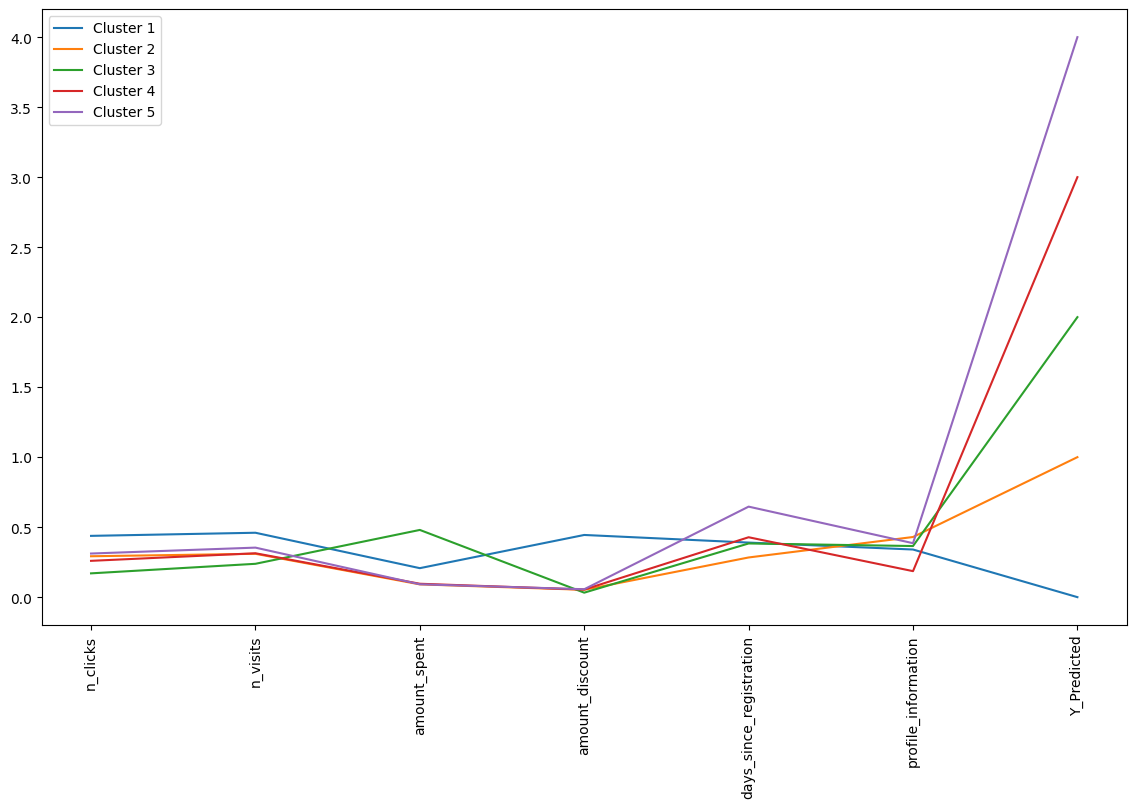

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


##### **Looking at this, What characteristics do we find unique in each of these learned cluster?**

- **Cluster 1** - Customer with high n_clicks,n_visit and amount_discount

- **Cluster 2** -  Customer with high profile_info

- **Cluster 3** - Customer with low n_clicks, low n_visit and high amount_spent

- **Cluster 4** - Customer with low profile_info

- **Cluster 5** - Customer with high day_since_registration and high profile_info

This way, with the help of Hierarchical Clustering, we can draw conclusions on how different data points are grouped into different clusters, and also get information about the features of the dataset based on which the grouping is done.

***

## Evaluation
---

#### **Quantitative : Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

# Hierarchical clustering
def hierarchical_clustering_silhouette(scaled_df, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, labels)
    return silhouette_avg

# Evaluate silhouette score for different numbers of clusters
for n_clusters in range(2, 9):
    silhouette_avg = hierarchical_clustering_silhouette(scaled_df, n_clusters)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.549855647440487
For n_clusters = 3, the average silhouette_score is : 0.5973168930049229
For n_clusters = 4, the average silhouette_score is : 0.67627015845168
For n_clusters = 5, the average silhouette_score is : 0.728196854022239
For n_clusters = 6, the average silhouette_score is : 0.5703566369722366
For n_clusters = 7, the average silhouette_score is : 0.43479242589796957
For n_clusters = 8, the average silhouette_score is : 0.4333665700474854


Observation :
- 5 cluster is giving us the best silhouette score

In [ ]:
 scaled_df['Y_Predicted']

,Y_Predicted
1476,1
1535,1
1807,0
1727,0
1324,1
...,...
1854,3
1190,1
1316,1
32,2


In [ ]:
scaled_df.shape

(2500, 8)